<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/PCAFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

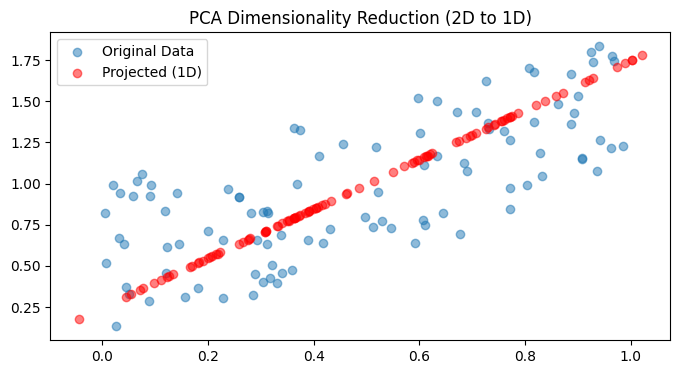

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # 1. Mean centering
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # 2. Covariance matrix (rowvar=False means columns are features)
        cov = np.cov(X_centered, rowvar=False)

        # 3. Eigenvalues and Eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # 4. Sort eigenvectors by descending eigenvalues
        # Note: eigenvectors are returned as column vectors (v[:, i])
        eigenvectors = eigenvectors.T
        indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[indices]
        eigenvectors = eigenvectors[indices]

        # 5. Store top k components
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # Project data onto the principal components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components.T)

# --- Visualization and Test ---
# Generate sample 2D data
np.random.seed(42)
X = np.dot(np.random.rand(100, 2), np.array([[1, 1], [0, 1]]))

# Fit and Transform to 1D
pca = PCA(n_components=1)
pca.fit(X)
X_projected = pca.transform(X)

# Graphing results
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
# Inverse transform for plotting the projected points in 2D space
X_reconstructed = np.dot(X_projected, pca.components) + pca.mean
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], color='red', alpha=0.5, label='Projected (1D)')
plt.title("PCA Dimensionality Reduction (2D to 1D)")
plt.legend()
plt.show()
